In [1]:
data = [
    {'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
    {'price':700000,'rooms':3,'neighborhood':'Fremont'},
    {'price':650000,'rooms':3,'neighborhood':'Wallingford'},
    {'price':600000,'rooms':2,'neighborhood':'Fremont'}
]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [3]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [4]:
vec = DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [5]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [6]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [7]:
from sklearn.feature_extraction.text import  CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [14]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
X = x[:,np.newaxis]
print(X)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


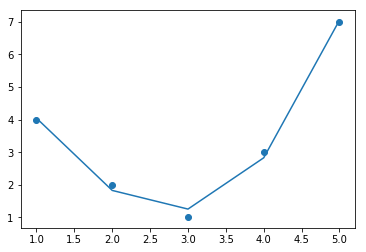

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit)

In [17]:
X = np.array([
    [np.nan,0,3],
    [3,7,9],
    [3,5,2],
    [4,np.nan,6],
    [8,8,1]
])
y = np.array([14,16,-1,8,-5])

In [19]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [20]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [21]:
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
